## Task1

ty = type, sequence of object like  Ty('egg', 'qubit'), ob = object

In [1]:
from discopy import Ob, Ty

egg, white, yolk = Ty('egg'), Ty('white'), Ty('yolk')

assert egg.objects == [Ob('egg')]
assert white @ yolk == Ty(Ob('white'), Ob('yolk'))

assert egg @ Ty() == egg == Ty() @ egg
assert egg @ (white @ yolk) == (egg @ white) @ yolk

C:\Users\junli\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\junli\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\junli\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


dom = top , cod = bottom

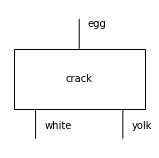

In [2]:
from discopy import Box

crack = Box('crack', dom=egg, cod=white @ yolk)

crack.draw(figsize=(2, 2))

 '>>' means sequence, is like lego top to bottom,   
 '@' mean connect side to side, procees left to right


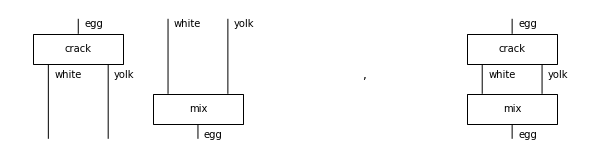

In [3]:
from discopy import drawing

mix = Box('mix', white @ yolk, egg)

crack_tensor_mix = crack @ mix
crack_then_mix = crack >> mix

drawing.equation(crack_tensor_mix, crack_then_mix, space=2, symbol=', ', figsize=(8, 2))

ID = identity, link to nothing

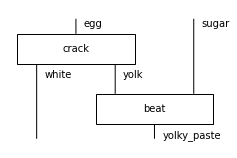

In [4]:
from discopy import Id

assert crack >> Id(white @ yolk) == crack == Id(egg) >> crack
assert crack @ Id(Ty()) == crack == Id(Ty()) @ crack

sugar, yolky_paste = Ty('sugar'), Ty('yolky_paste')
beat = Box('beat', yolk @ sugar, yolky_paste)

crack_then_beat = crack @ Id(sugar) >> Id(white) @ beat

crack_then_beat.draw(figsize=(3, 2))

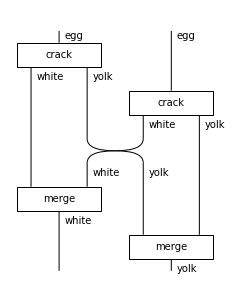

In [5]:
from discopy import Swap

merge = lambda x: Box('merge', x @ x, x)

crack_two_eggs = crack @ crack\
    >> Id(white) @ Swap(yolk, white) @ Id(yolk)\
    >> merge(white) @ merge(yolk)

crack_two_eggs.draw(figsize=(3, 4))

offsets is left to right(x-coor)   
[Box('crack', Ty('egg'), Ty('white', 'yolk')),   0    
 Box('crack', Ty('egg'), Ty('white', 'yolk')),   2   
 Swap(Ty('yolk'), Ty('white')),   1   
 Box('merge', Ty('white', 'white'), Ty('white')),   0   
 Box('merge', Ty('yolk', 'yolk'), Ty('yolk'))]   1   

In [6]:
from discopy import Diagram

def pretty(diagram):
    return "Diagram(\n"\
    + "    dom={},\n".format(repr(diagram.dom))\
    + "    cod={},\n".format(repr(diagram.cod))\
    + "    boxes=[{}],\n".format(',\n           '.join(map(repr, diagram.boxes)))\
    + "    offsets={})".format(diagram.offsets)

assertion = "assert crack_two_eggs == {}".format(pretty(crack_two_eggs))

exec(assertion)
print(assertion)

assert crack_two_eggs == Diagram(
    dom=Ty('egg', 'egg'),
    cod=Ty('white', 'yolk'),
    boxes=[Box('crack', Ty('egg'), Ty('white', 'yolk')),
           Box('crack', Ty('egg'), Ty('white', 'yolk')),
           Swap(Ty('yolk'), Ty('white')),
           Box('merge', Ty('white', 'white'), Ty('white')),
           Box('merge', Ty('yolk', 'yolk'), Ty('yolk'))],
    offsets=[0, 2, 1, 0, 1])


functor apply offsets

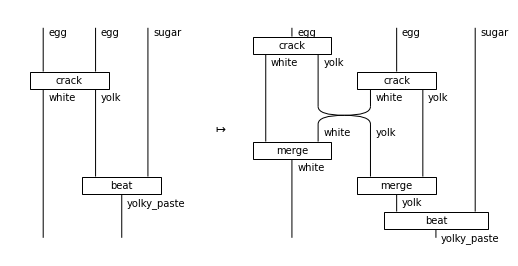

In [7]:
from discopy import Functor

crack2 = Box("crack", egg @ egg, white @ yolk)

open_crack2 = Functor(
    ob=lambda x: x,
    ar={crack2: crack_two_eggs, beat: beat})

crack2_then_beat = crack2 @ Id(sugar) >> Id(white) @ beat

drawing.equation(
    crack2_then_beat,
    open_crack2(crack2_then_beat),
    symbol='$\\mapsto$', figsize=(7, 3.5))

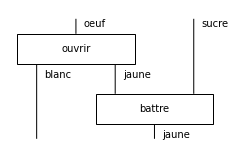

In [8]:
oeuf, blanc, jaune, sucre = Ty("oeuf"), Ty("blanc"), Ty("jaune"), Ty("sucre")

ouvrir = Box("ouvrir", oeuf, blanc @ jaune)
battre = Box("battre", jaune @ sucre, jaune)

english2french = Functor(
    ob={egg: oeuf,
        white: blanc,
        yolk: jaune,
        sugar: sucre,
        yolky_paste: jaune},
    ar={crack: ouvrir,
        beat: battre})

english2french(crack_then_beat).draw(figsize=(3, 2))

In [11]:
鸡蛋, 蛋白, 蛋黄, 糖 = Ty("鸡蛋"), Ty("白色"), Ty("蛋黄"), Ty("糖")
打碎 = Box("打碎", 鸡蛋, 蛋白 @ 蛋黄)
揉打 = Box("揉打", 蛋黄 @ 糖, 蛋黄)

english2chinese = Functor(
    ob={egg: 鸡蛋,
        white: 蛋白,
        yolk: 蛋黄,
        sugar: 糖,
        yolky_paste: 蛋黄},
    ar={crack: 打碎,
        beat: 揉打})

C:\Users\junli\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25171 (\N{CJK UNIFIED IDEOGRAPH-6253}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\junli\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30862 (\N{CJK UNIFIED IDEOGRAPH-788E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\junli\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25545 (\N{CJK UNIFIED IDEOGRAPH-63C9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


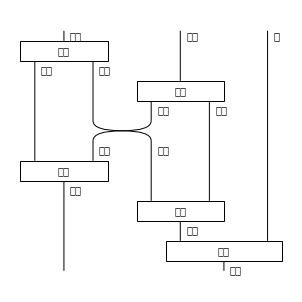

In [12]:
混合 = lambda x: Box("混合", x @ x, x)

for x in [white, yolk]:
    english2chinese.ar[merge(x)] = 混合(english2chinese(x))
english2chinese(open_crack2(crack2_then_beat)).draw(figsize=(4, 4))

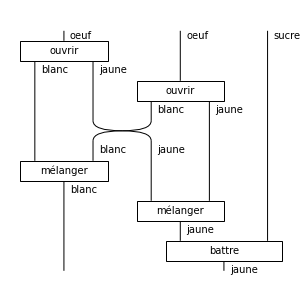

In [67]:
melanger = lambda x: Box("mélanger", x @ x, x)

for x in [white, yolk]:
    english2french.ar[merge(x)] = melanger(english2french(x))

english2french(open_crack2(crack2_then_beat)).draw(figsize=(4, 4))

In [15]:
from discopy import Dim, Tensor

matrix = Tensor(Dim(2), Dim(2), [0, 1, 1, 0])

matrix.array

array([[0, 1],
       [1, 0]])

In [17]:
assert matrix >> Tensor.id(Dim(2)) == matrix == Tensor.id(Dim(2)) >> matrix

vector = Tensor(Dim(1), Dim(2), [0, 1])

(vector >> matrix)

Tensor(dom=Dim(1), cod=Dim(2), array=[1, 0])

In [18]:
matrix = Tensor(Dim(2), Dim(2), [0, -1j, 1j, 0])

matrix >> matrix

Tensor(dom=Dim(2), cod=Dim(2), array=[1.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])

In [19]:
vector1 = Tensor(Dim(1), Dim(2), [-1j, 1j])

vector >> vector1[::-1]

Tensor(dom=Dim(1), cod=Dim(1), array=[0.-1.j])

zeros,id,swap

In [22]:
swap = Tensor.swap(Dim(2), Dim(3))

assert swap.dom == Dim(2) @ Dim(3) and swap.cod == Dim(3) @ Dim(2)
assert swap >> swap[::-1] == Tensor.id(Dim(2, 3))
assert swap[::-1] >> swap == Tensor.id(Dim(3, 2))

matrix1 = Tensor(Dim(3), Dim(3), list(range(9)))

assert vector @ matrix1 >> swap == matrix1 @ vector
assert swap >> matrix1 @ matrix >> swap[::-1] == matrix @ matrix1

In [25]:
cup, cap = Tensor.cups(Dim(2), Dim(2)), Tensor.caps(Dim(2), Dim(2))

print("cup == {}".format(cup))
print("cap == {}".format(cap))


cup == Tensor(dom=Dim(2, 2), cod=Dim(1), array=[1., 0., 0., 1.])
cap == Tensor(dom=Dim(1), cod=Dim(2, 2), array=[1., 0., 0., 1.])


cup and cap is identity in difference way

In [26]:
_id = Tensor.id(Dim(2))

assert cap @ _id >> _id @ cup == _id == _id @ cap >> cup @ _id

In [34]:
cup @ _id

Tensor(dom=Dim(2, 2, 2), cod=Dim(2), array=[1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])

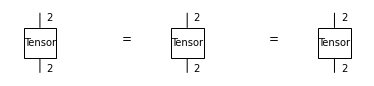

In [33]:
drawing.equation(cap @ _id >> _id @ cup, _id, _id @ cap >> cup @ _id, figsize=(5, 1))

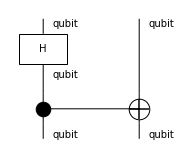

In [44]:
from discopy.quantum import qubit, H, Id, CX, QuantumGate
import numpy as np

assert H == QuantumGate("H", 1, 1 / np.sqrt(2) * np.array([1, 1, 1, -1]), _dagger=None)

circuit = H @ Id(qubit) >> CX

circuit.draw(figsize=(2, 2), draw_type_labels=True, margins=(.1, .1))

In [41]:
from discopy.quantum import Measure, Discard, Ket, Bra

print(Discard().eval())
print(Measure().eval())

CQMap(dom=Q(Dim(2)), cod=CQ(), array=[1.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])
CQMap(dom=Q(Dim(2)), cod=C(Dim(2)), array=[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])


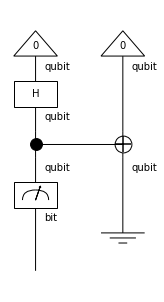

CQMap(dom=CQ(), cod=C(Dim(2)), array=[0.5+0.j, 0.5+0.j])

In [45]:

(Ket(0, 0) >> circuit >> Measure() @ Discard()).draw(figsize=(2, 4))
(Ket(0, 0) >> circuit >> Measure() @ Discard()).eval()

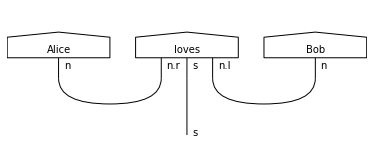

In [46]:
from discopy import Ty, Id, Word, Cup, pregroup

n, s = Ty('n'), Ty('s')

Alice = Word("Alice", n)
loves = Word("loves", n.r @ s @ n.l)
Bob = Word("Bob", n)

grammar = Cup(n, n.r) @ Id(s) @ Cup(n.l, n)

sentence = Alice @ loves @ Bob >> grammar
pregroup.draw(sentence, figsize=(5, 5))

## Task 2

Can QNLP offer the possibility to build interpretable systems?

- food: “skilful cook prepares meal”
- IT: “programmer writes complicated code”

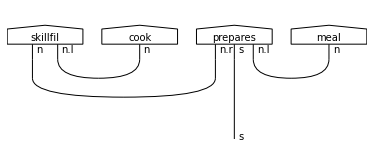

In [59]:
n, s = Ty('n'), Ty('s')

skillful = Word("skillfil", n @ n.l)
cook = Word("cook", n)
prepares = Word("prepares", n.r @ s @ n.l)
meal = Word("meal",n)

sentence = skillful @ cook @ prepares @ meal \
            >> Id(n) @ Cup(n.l,n) @ Id(n.r @ s) @ Cup(n.l,n)\
            >> Cup(n,n.r) @ Id(s)
pregroup.draw(sentence, figsize=(5, 5))

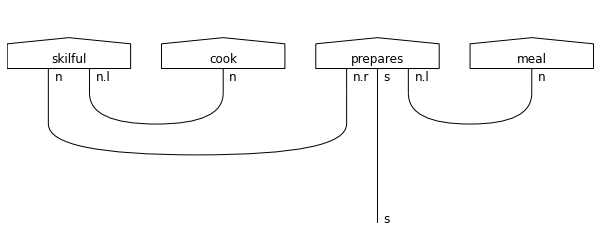

In [4]:
from lambeq import BobcatParser
from discopy import grammar

sentence = 'skilful cook prepares meal'

# Parse the sentence and convert it into a string diagram
parser = BobcatParser(verbose='suppress')
diagram = parser.sentence2diagram(sentence)

grammar.draw(diagram, figsize=(14,3), fontsize=12)

In [5]:
sentence = ["skilful cook prepares meal", "programmer writes complicated code"]

In [6]:
from lambeq import BobcatParser

parser = BobcatParser(verbose='text')

raw_train_diagrams = parser.sentences2diagrams(sentence)

Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.


In [9]:
from lambeq import remove_cups
train_diagrams = [remove_cups(diagram) for diagram in raw_train_diagrams]

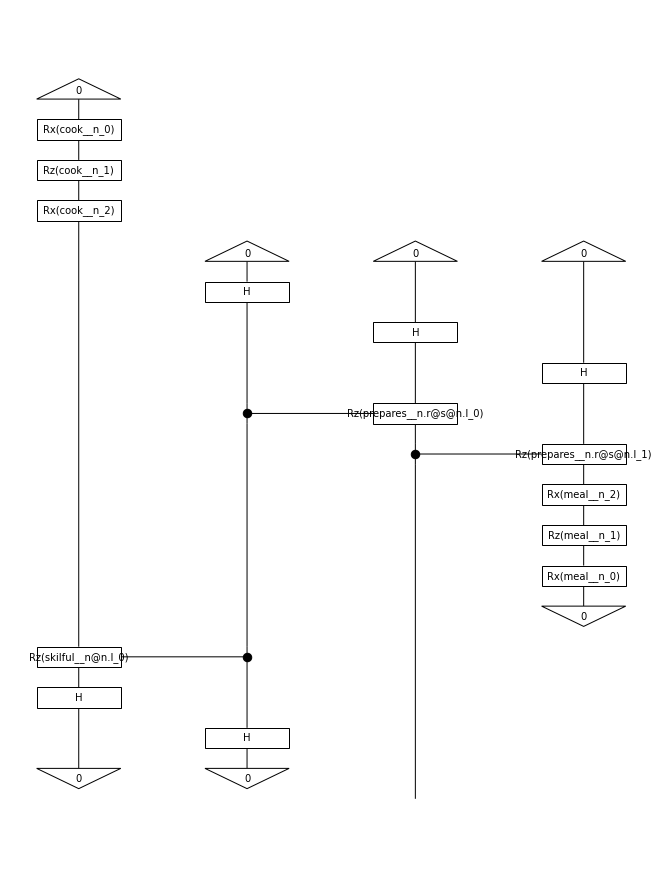

In [10]:
from lambeq import AtomicType, IQPAnsatz

ansatz = IQPAnsatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1},
                   n_layers=1, n_single_qubit_params=3)

train_circuits = [ansatz(diagram) for diagram in train_diagrams]

train_circuits[0].draw(figsize=(9, 12))

In [12]:
from lambeq import NumpyModel

all_circuits = train_circuits

model = NumpyModel.from_diagrams(all_circuits, use_jit=True)

In [13]:
loss = lambda y_hat, y: -np.sum(y * np.log(y_hat)) / len(y)  # binary cross-entropy loss
acc = lambda y_hat, y: np.sum(np.round(y_hat) == y) / len(y) / 2  # half due to double-counting

In [16]:
import numpy as np

BATCH_SIZE = 30
LEARNING_RATE = 3e-2
EPOCHS = 120
SEED = 0

In [17]:
from lambeq import QuantumTrainer, SPSAOptimizer

trainer = QuantumTrainer(
    model,
    loss_function=loss,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,
    optim_hyperparams={'a': 0.2, 'c': 0.06, 'A':0.01*EPOCHS},
    evaluate_functions={'acc': acc},
    evaluate_on_train=True,
    verbose = 'text',
    seed=0
)

In [21]:
from lambeq import Dataset

train_dataset = Dataset(
            train_circuits,
            train_labels,
            batch_size=BATCH_SIZE)

val_dataset = Dataset(dev_circuits, dev_labels, shuffle=False)

NameError: name 'train_labels' is not defined

In [1]:
from lambeq import BobcatParser, TreeReader, TreeReaderMode

C:\Users\junli\anaconda3\envs\womanium\lib\site-packages\lambeq\text2diagram\ccg_parser.py:24: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


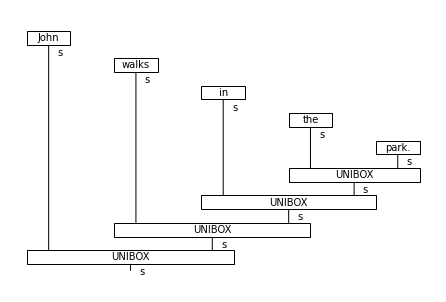

In [2]:
sentence = 'John walks in the park.'
reader = TreeReader(ccg_parser=BobcatParser, mode = TreeReaderMode.NO_TYPE)
reader.sentence2diagram(sentence=sentence).draw()

In [3]:
reader = TreeReader(ccg_parser=BobcatParser, mode=TreeReaderMode.RULE_ONLY)
reader.sentence2diagram(sentence).draw()

OSError: Unable to load weights from pytorch checkpoint file for 'C:\Users\junli\.cache\lambeq\bobcat\bert\pytorch_model.bin' at 'C:\Users\junli\.cache\lambeq\bobcat\bert\pytorch_model.bin'. If you tried to load a PyTorch model from a TF 2.0 checkpoint, please set from_tf=True.

In [4]:
reader = TreeReader(ccg_parser=BobcatParser, mode=TreeReaderMode.RULE_TYPE)
reader.sentence2diagram(sentence).draw()

OSError: Unable to load weights from pytorch checkpoint file for 'C:\Users\junli\.cache\lambeq\bobcat\bert\pytorch_model.bin' at 'C:\Users\junli\.cache\lambeq\bobcat\bert\pytorch_model.bin'. If you tried to load a PyTorch model from a TF 2.0 checkpoint, please set from_tf=True.

In [ ]:
from discopy.quantum import circuit, qubit, sqrt, X

F_ = circuit.Functor(
    ob={s: Ty(), n: qubit},
    ar={Alice: Ket(0),
        loves: sqrt(2) @ Ket(0, 0) >> H @ X >> CX,
        Bob: Ket(1)})

F_(sentence).draw(figsize=(6, 6))

assert F_(sentence).eval() == F(sentence)